In [18]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import libpysal as lps
import esda
import geopandas as gpd
import seaborn
from splot import esda as esdaplot
import contextily 

In [ ]:
# code adoted from https://geographicdata.science/book/notebooks/07_local_autocorrelation.html

In [21]:
Manchester_prediction = gpd.read_file('test.shp')
Manchester_prediction.crs = 'epsg:4326'

weights = lps.weights.Queen.from_dataframe(Manchester_prediction) 
weights.transform = "R"
spatial_auto = esda.Moran(Manchester_prediction['prediction'], weights, permutations=999)

In [22]:
spatial_auto.I

0.6567577702996431

In [23]:
spatial_auto.p_sim

0.001

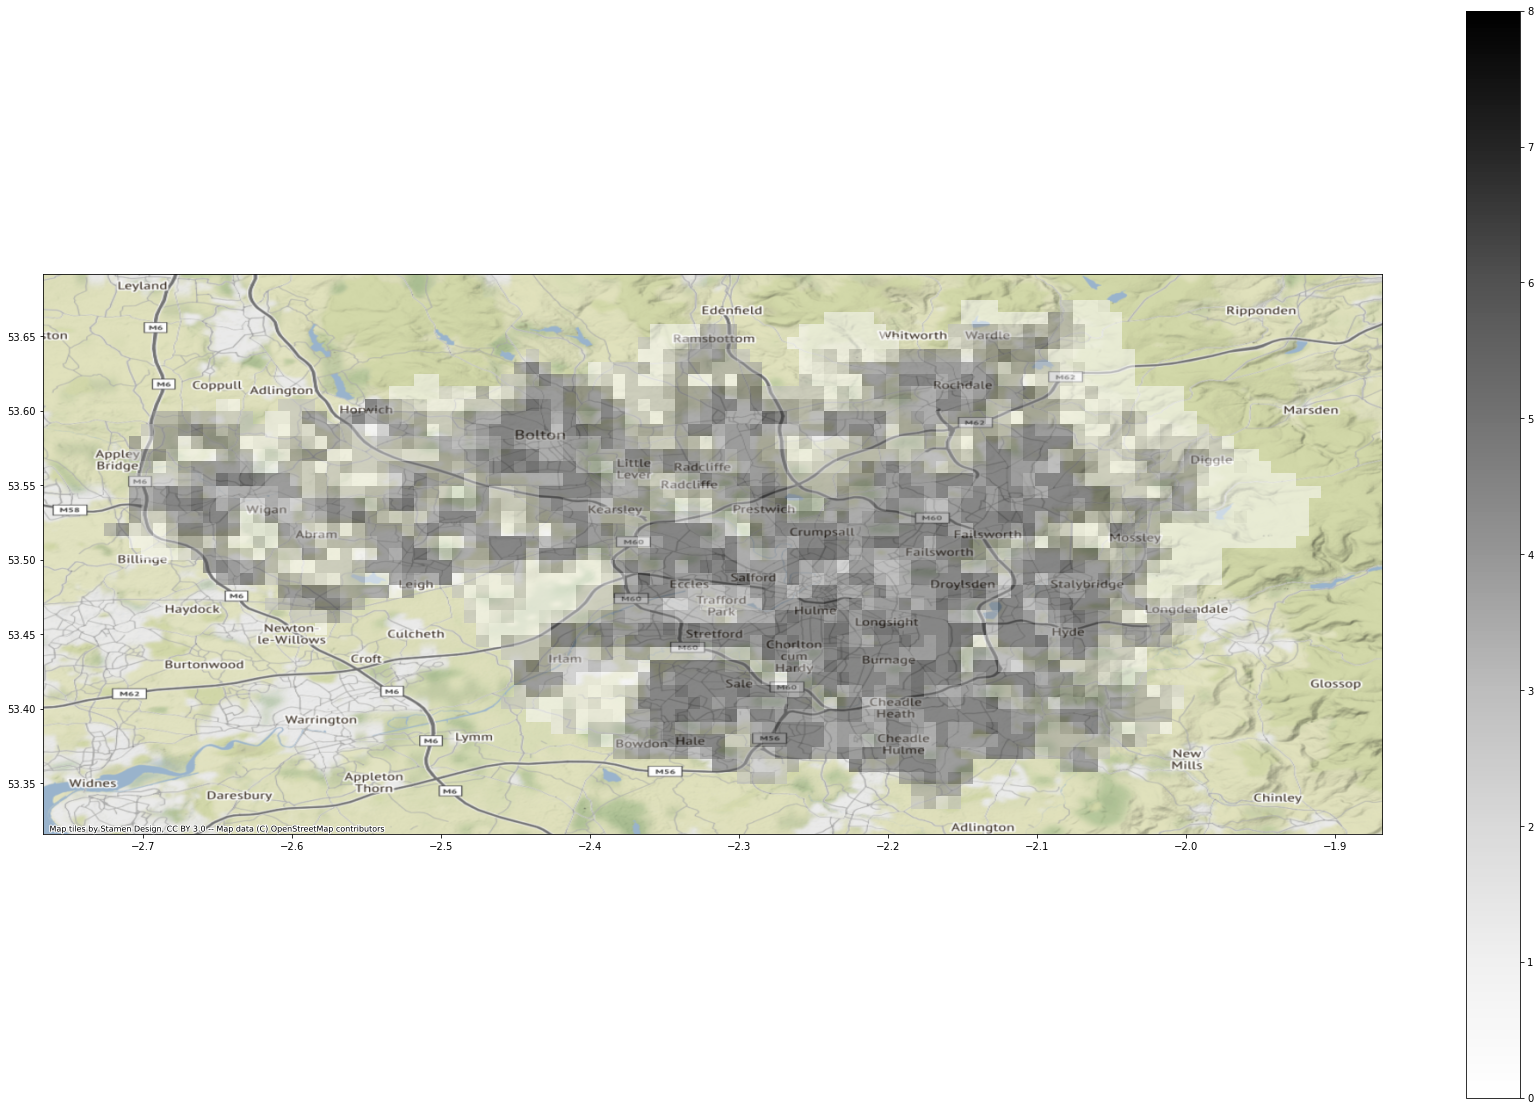

In [24]:
# Local Moran's I
lisa = esda.moran.Moran_Local(Manchester_prediction['prediction'], weights)
# ax = esdaplot.lisa_cluster(lisa, Manchester_prediction, p=0.05, alpha=0.5)
ax = Manchester_prediction.plot(figsize=(30, 20),column="prediction", alpha=0.5, cmap='Greys', legend=True)
contextily.add_basemap(ax, crs=Manchester_prediction.crs)

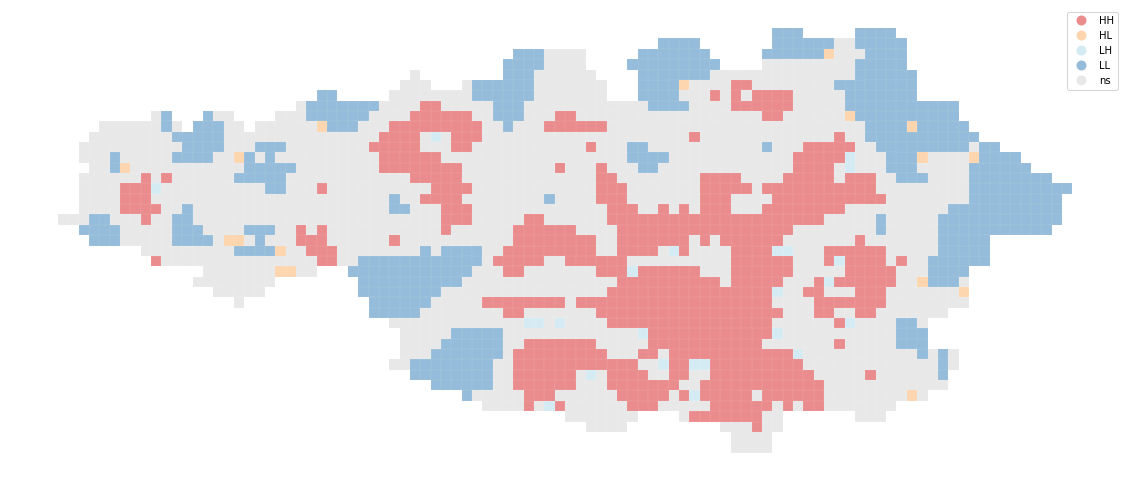

In [25]:
lisa = esda.moran.Moran_Local(Manchester_prediction['prediction'], weights)
ax = esdaplot.lisa_cluster(lisa, Manchester_prediction, p=0.05, alpha=0.5, figsize=(20, 20))

In [26]:
lisa.q

array([3, 3, 3, ..., 1, 1, 1])

In [27]:
Manchester_prediction['LocalM'] = list(lisa.q)
Manchester_prediction['LocalM_p_value'] = list(lisa.p_sim)
sig = lisa.p_sim < 0.05 #significance level

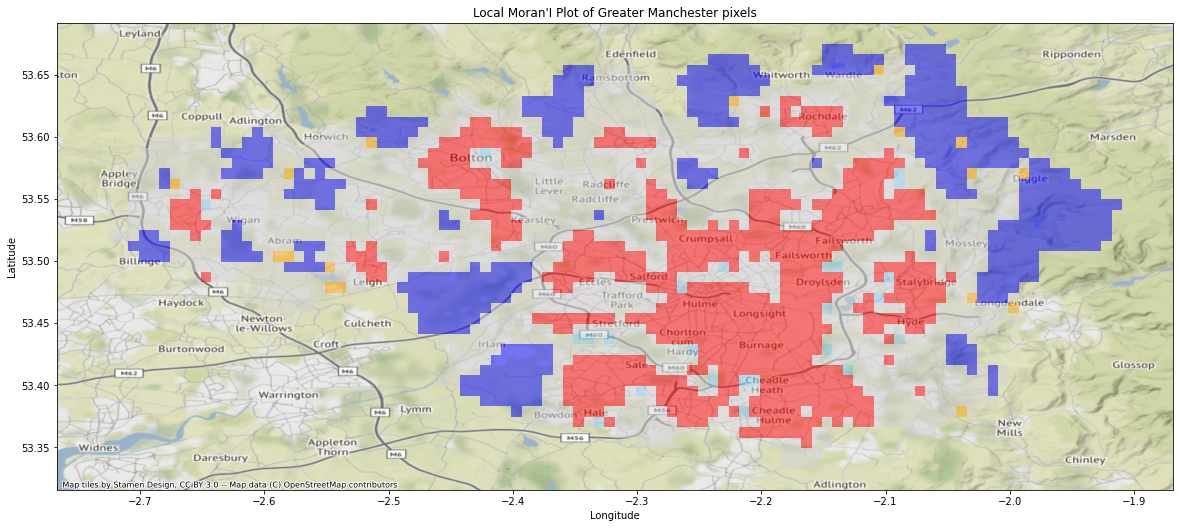

In [28]:
# code adopted from https://geographicdata.science/book/notebooks/07_local_autocorrelation.html
# Plot non-significant clusters
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Local Moran\'I Plot of Greater Manchester pixels')
ax.set_xlabel('Longitude') 
ax.set_ylabel('Latitude') 
ns = Manchester_prediction.loc[sig == False, "geometry"]
ns.plot(ax=ax, color="lightgrey", linewidth=0.1, alpha=0.5)
hh = Manchester_prediction.loc[(lisa.q == 1) & (sig == True), "geometry"]
hh.plot(ax=ax, color="red", linewidth=0.1, alpha=0.5)
ll = Manchester_prediction.loc[(lisa.q == 3) & (sig == True), "geometry"]
ll.plot(ax=ax, color="blue", linewidth=0.1, alpha=0.5)
lh = Manchester_prediction.loc[(lisa.q == 2) & (sig == True), "geometry"]
lh.plot(ax=ax, color="skyblue", linewidth=0.1, alpha=0.5)
hl = Manchester_prediction.loc[(lisa.q == 4) & (sig == True), "geometry"]
hl.plot(ax=ax, color="orange", linewidth=0.1, alpha=0.5)
contextily.add_basemap(ax, crs=Manchester_prediction.crs)

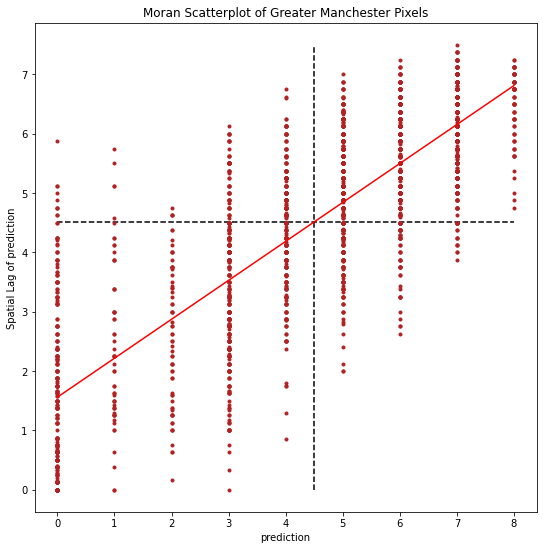

In [30]:
# Moran scatter plot
lag_population = lps.weights.lag_spatial(weights, Manchester_prediction['prediction'])
prediction = Manchester_prediction['prediction']
b, a = np.polyfit(prediction, lag_population, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(prediction, lag_population, '.', color='firebrick')

 # dashed vert at mean of the prediction
plt.vlines(prediction.mean(), lag_population.min(), lag_population.max(), linestyle='--')
 # dashed horizontal at mean of lag_population
plt.hlines(lag_population.mean(), prediction.min(), prediction.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(prediction, a + b*prediction, 'r')
plt.title('Moran Scatterplot of Greater Manchester Pixels')
plt.ylabel('Spatial Lag of prediction')
plt.xlabel('prediction')
plt.show()